In [ ]:
 ########네이트 뉴스를 수집하고 뉴스에서 탑키워드를 추출하는 코드입니다.
install.packages("rvest")

In [1]:
library(stringr)
library(rvest)

Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'rvest' was built under R version 3.6.3"Loading required package: xml2
Warning message:
"package 'xml2' was built under R version 3.6.3"

In [3]:
# 사용할 변수 선언
x<-0
dadate<-as.Date(Sys.time())-x  ## 현재날짜
dadate2<-gsub("-","",dadate)


In [2]:
final_data<-NULL ## 최종적으로 들어갈 Dataframe선언, 제목과 URL만 가져옴

In [4]:
day_url<-NULL
day_title<-NULL

In [7]:
## url지정
i<-1
url<-paste0("http://news.nate.com/recent?cate=pol&mid=n0201&type=c&date=",dadate2,"&page=",i) 
url

[1] "http://news.nate.com/recent?cate=pol&mid=n0201&type=c&date=20200409&page=1"

In [ ]:
b<-readLines(url, encoding = "UTF-8")
head(b, 10)

In [ ]:
# 인코딩 수정
bb<-repair_encoding(b)
head(bb, 10)

In [ ]:
# 제목 가져오기
b2<-b[which(str_detect(b,"strong class=\"tit\">"))]
b3<-repair_encoding(b2)
b3

In [ ]:
### 제목
title<-str_extract(b3,"(?<=\"tit\">).*(?=</strong>)")
day_title<-c(day_title,title)
day_title

In [ ]:
###  url가져오기 
uu<-b[(str_detect(b,"lt1"))]
urlgroup<-str_extract(uu,"(?<=a href=).*(?=class)")
urlgroup

In [ ]:
url_list<-str_sub(urlgroup,2,end=-4)
day_url<-c(day_url,url_list)
url_list

In [ ]:
# 날짜 변동
for(x in 1:5){
    dadate<-as.Date(Sys.time())-x  ## 현재날짜
    dadate2<-gsub("-","",dadate)
    day_url<-NULL
    day_title<-NULL
    # 페이지 변동
    for(i in 1:10){
        ## url지정
        url<-paste0("http://news.nate.com/recent?cate=pol&mid=n0201&type=c&date=",dadate2,"&page=",i) 
        b<-readLines(url,encoding = "UTF-8")
        bb<-repair_encoding(b)
        if(sum(str_detect(bb,"없습니다"))>0){ ## 기사가 없는 경우 break;
        break;
        }
        b2<-b[which(str_detect(b,"strong class=\"tit\">"))]
        b3<-repair_encoding(b2)
        ### 제목
        title<-str_extract(b3,"(?<=\"tit\">).*(?=</strong>)")
        day_title<-c(day_title,title)
        ###  url가져오기 
        uu<-b[(str_detect(b,"lt1"))]
        urlgroup<-str_extract(uu,"(?<=a href=).*(?=class)")
        url_list<-str_sub(urlgroup,2,end=-4)
        day_url<-c(day_url,url_list)
        cat("\n",x,"-",i)
    }
    day_data<-cbind(dadate2,day_url,day_title)
    final_data<-rbind(final_data,day_data)
}

In [7]:
# 뉴스 목록 저장
getwd()
# setwd("./Data/")
save(final_data,file="url_list.RData")

[1] "C:/Users/501-1/PNU_201912/10.R.주요업종별예측모델구축및분석/The R/Crawling-using-R-master/Data"

In [3]:
# 뉴스 목록 읽기
getwd()
setwd("./Data")
load("url_list.RData")

[1] "C:/Users/501-1/PNU_201912/10.R.주요업종별예측모델구축및분석/The R/Crawling-using-R-master"

In [4]:
head(final_data)

dadate2,day_url,day_title
20200408,//news.nate.com/view/20200408n27835?mid=n0201,한국당 23% vs 더불어시민당 22.1%…비례정당 지지율差 1%P 내로 좁혀져
20200408,//news.nate.com/view/20200408n27840?mid=n0201,"민주당 47.7% vs 통합당 28.3%…與, 영남 뺀 모든 지역 '우세'"
20200408,//news.nate.com/view/20200408n42788?mid=n0201,"김경진 ""총선 후 민주당 입당""…이해찬 ""돌아올 일 없다"""
20200408,//news.nate.com/view/20200408n40821?mid=n0201,[비디오머그] 리그 오브 금뺏지 EP3. 외로운 탑 라인 왕의 귀환은 누구?
20200408,//news.nate.com/view/20200408n40133?mid=n0201,"통합당 미디어특위 위원 ""차명진, 무슨 못할 말 했나"""
20200408,//news.nate.com/view/20200408n30986?mid=n0201,"차명진 또 세월호 막말 ""세월호 텐트서 유가족 문란한 행위"""


In [5]:
news_url<-final_data[,2] ## url할당, 다시 각 url에 접근하여 내용 추출
i<-1
news_list<-list()

In [8]:
head(paste0("https:",news_url))

[1] "https://news.nate.com/view/20200408n27835?mid=n0201"
[2] "https://news.nate.com/view/20200408n27840?mid=n0201"
[3] "https://news.nate.com/view/20200408n42788?mid=n0201"
[4] "https://news.nate.com/view/20200408n40821?mid=n0201"
[5] "https://news.nate.com/view/20200408n40133?mid=n0201"
[6] "https://news.nate.com/view/20200408n30986?mid=n0201"

In [ ]:
for(i in 1:length(news_url)){
  if(class(try(b<-readLines(paste0("https:",news_url[i]),encoding = "EUC-KR") ))=='try-error'){
    j<-0
    while(class(try(b<-readLines(paste0("https:",news_url[i]),encoding = "EUC-KR") ))=='try-error'){ ## 서버 또는 클라이언트의 문제로 크롤링이 안될경우 5회 시도, 그래도 안되면 NA부여
    if(j == 5){    
      news_list[[i]] <-  NA 
       next;
    }  
      Sys.sleep(5)
   }
  }

 b<-repair_encoding(b)
 index1<-which(str_detect(b,"<!-- 기사 내용 -->"))
 index2<-which(str_detect(b,"기자 sign -->")) 
 b2<-paste(b[index1:index2],collapse="")
 b3<-gsub("<.*?>","",b2)
 b4<-str_split(b3,"이 시각 많이 본 기사|관련뉴스")  
 news_list[[i]] <-  b4[[1]][1]  
 cat("\n",i)
}

In [ ]:
head(news_list, 2)

In [9]:
final_news<-do.call("c",news_list)
save(final_news,file="final_news.RData")

In [ ]:
load("final_news.RData")
head(final_news, 2)

In [13]:
library(KoNLP)
library(stringr)

Warning message:
"package 'KoNLP' was built under R version 3.6.2"Checking user defined dictionary!



In [ ]:
########각종 불용어 제거 
review<-final_news

comments<-gsub("<.*?>","",review)
comments<-gsub("\t","",comments)
comments<-gsub("[][!#$%*,:;<=>@_`|‘~{}&★☆ㅋㅎ《》◈△▲▽▼○●◎◇◆□◁◀▷▶♤♠♡♥♧♣◉◈▣■◐◑♨☏☎☜☞↖↘♭♩♪♬㈜ⓒ]", " ",comments)
comments<-gsub("rdquo|gt|lt|nbsp|amp|quot|apos","",comments)
comments<-gsub("  "," ",comments)
comments<-gsub("\\^"," ",comments)
comments<-gsub("ㅠ|ㅜ|ㅡ|ㅎ"," ",comments)
comments<-gsub("\"|\n|+","",comments)
comments<-gsub("\\+","",comments)
comments<-gsub("/|!|\\*|\\+|\\@"," ",comments)
comments<-gsub("'","",comments)
comments<-gsub("\"","",comments)
comments<-gsub("\"","",comments)
comments<-gsub("=","",comments)
comments<-gsub("~|;|<|>","",comments)
comments<-gsub("\\?","",comments)
comments<-gsub("\\[.*?\\]","",comments)
comments<-gsub("\\(.*?\\)","",comments)
comments<-gsub("\\(|\\)"," ",comments)
comments<-gsub("\\]|\\[|\\(|\\)|:|-|\\,|\\."," ",comments)
comments<-gsub("\\!","",comments)
comments<-gsub("\"\"","",comments)

head(comments)

In [17]:
### 특수문자외에 제거할 불영어
er<-c("","것","원","저","년","역","나","이","수","월","한","동","대","전","층","들","때",
      "개","분","적","후","점","시","별","보건증","곳","번","해서","쪽","데","말","시작","우리",
      "이번","중","지원","사러가기","명","주","기","소","률","판","판매목표","구","지금샵","co","kr","com","무단전재","저작권자",
      "일","or","드","뭐","백","천","듯","만","우","잭","거","애","등","두","타","to","the","copyrights","properties","var",
      "내","제","함","지","라","안","혜")

In [ ]:
length(comments)
library(KoNLP)
je<-list()

for(i in 1:length(comments)){
  ### 형태소 분석 결과 list에 저장, 만일 형태소 분석에 에러가 날경우 빈공백 삽입 
  if(class(try(je[[i]]<-SimplePos09(comments[i])))=='try-error'){
    je[[i]]<-""
    next;
  }
  cat("\n",i)
}

In [19]:
je2<-do.call("c",je)
head(je2)

$비례투표
[1] "비례투표/N"

$향방은열린민주당
[1] "향방은열린민주당/N"

$`·정의당`
[1] "·/S+정의당/N"

$`13`
[1] "13/N"

$`6`
[1] "6/N"

$범여권
[1] "범/N+여/X+권/N"

In [ ]:
je3<-str_split(je2,"/") ### 형태소 분석결과를 "/"로 분리
head(je3)

In [21]:
### "/"로 분리된 형태소 분석결과(vector)중 가장 첫번째 요소만 가져옴
je4<-sapply(je3,function(x){x[1]})
head(je4)

[1] "비례투표"         "향방은열린민주당" "·"               "13"              
[5] "6"                "범"

In [23]:
je5<-table(je4) ## 빈도수 통계 계산
head(je5)

je4
              .      ..     ... ...유럽       ? 
      1     282      13      33       2       3 

In [24]:
sort(je5,decreasing = T)[1:20] ## top20개

je4
        있       후보         하         것          1         이          8 
      5038       5005       4236       3292       2708       2643       2056 
        수       총선         말         되     민주당        css  frmTarget 
      1836       1731       1616       1515       1384       1342       1342 
setYoutube      width         등     통합당       대하          4 
      1342       1342       1316       1303       1189       1132 

In [25]:
je6<-(je5)[!names(je5) %in% er] ## 불용어 제거
je7<-je6[!nchar(names(je6)) == 1] ## 한글자 제거 
je8<-je7[!str_detect(names(je7),"\\d")] ## 숫자 들어간 것들 제거(분석 목표가 무엇이냐에 따라 달라짐)

In [26]:
top_word<-sort(je8,decreasing = T)[1:100] ##  top 100개 지정
save(top_word,file="top_word.RData")

In [28]:
head(top_word)

je4
      후보       총선     민주당        css  frmTarget setYoutube 
      5005       1731       1384       1342       1342       1342 

In [30]:
load("top_word.RData")


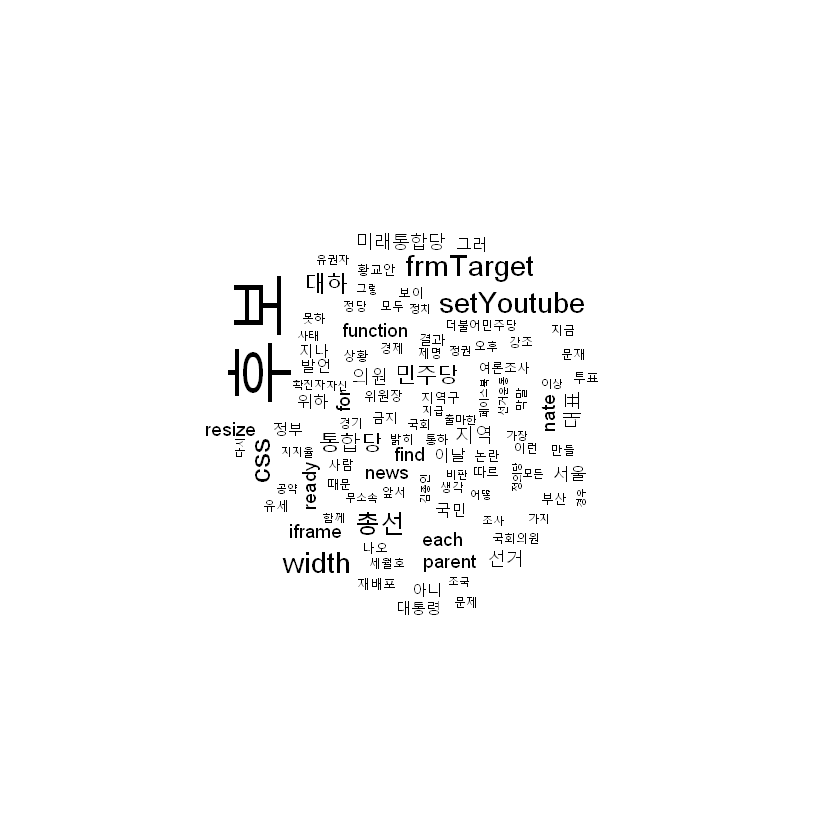

In [31]:
#########워드클라우드 그리는 법
## 기본적인 워드클라우드 패키지는 "wordcloud"이나 자신이 원하는 이미지의 형태로 만들고 싶다면 "wordcloud2"를 사용하시면 됩니다. 워드클라우드를 하나하나 정성 스레 만들때에는 tagxedo사이트 (http://www.tagxedo.com/)에서 만드시는걸 권장 드립니다. 다량의 워드클라우드를 만들때에는 R을 사용하시면 편합니다.
# install.packages("wordcloud")
library(wordcloud)
# word<-names(je8) ## 단어 설정
# freq<-as.numeric(je8) ## 빈도수 설정
word<-names(top_word) ## 단어 설정
freq<-as.numeric(top_word) ## 빈도수 설정
wordcloud(word,freq) ## 기본적으로 워드클라우드 그리는 법

In [ ]:
install.packages("extrafont") ## 워드클라우드에 외부 폰트 적용할수 있는 패키지
library(extrafont)
font_import()  ## 시스템에 설치되있는 외부 폰트를 R에서 쓸수 있게 import시키는 과정입니다. 이 코드를 실행하시고 Y를 누르시고 enter를 누르시면 폰트가 import 되는데 20~30분정도 소요됩니다.
fonttable()[,4] ## fonttable()하시면 사용가능한 폰트 목록이 보이는데 여기서 네번쨰 칼럼에 있는 폰트명을 사용하시면됩니다.
windowsFonts(malgun=windowsFont("YJ INJANG Medium"))  ## 폰트명 설정
wordcloud(word,freq,family="malgun") ## 다음과 같이 폰트를 지정해서 워드클라우드를 그릴 수 있습니다.

In [ ]:
### 맛있다 -> "맛있"만 추출
### 맛있네요 -> "맛있"만 추출

## 자동으로 working directory에 이미지를 저장하고 싶다면 아래 코드를 사용하시면 됩니다. 
png(paste0("wordcloud_image.png"), width=720,height=320)
windowsFonts(malgun=windowsFont("YJ INJANG Medium")) 
wordcloud(word,freq,family="malgun") 
dev.off()
##여기에 글씨색깔만 조절해준다면 충분히 이쁜 워드클라우드를 만들 수 있습니다. 